In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
%matplotlib inline
import seaborn as sns

################ USER FUNCTION ################
import user_functions as uf
###############################################
rc("font", family="AppleGothic")
rcParams["font.family"] = "AppleGothic"
plt.rc("font", family="AppleGothic")

In [25]:
# load
datasets = pd.read_csv("../pre_data/[no_up]train_datasets.csv", index_col=0)
# datasets.loc[:, "TARGET"] = \
#     datasets["TARGET"].apply(lambda x: "연체" if x == 1 else "우량")

In [85]:
# POS_CASH: Point of sales loan(소비재 구매 시 할부 대출) 관련 자료
pos_cash_ds = pd.read_csv("../pre_data/new_POS_CASH_balance.csv")

In [86]:
pos_cash_ds

,SK_ID_CURR,SK_DPD,소액연체_비율
0,100001,7,0.0
1,100002,0,0.0
2,100003,0,0.0
3,100004,0,0.0
4,100005,0,0.0
...,...,...,...
337247,456251,0,0.0
337248,456252,0,0.0
337249,456253,5,0.0
337250,456254,0,0.0


In [32]:
pos_cash_ds.loc[pos_cash_ds["TARGET"] == 1, "연체기간(pos_cash)"].value_counts()

0.0       19063
1.0         362
2.0         287
3.0         242
5.0         221
          ...  
357.0         1
216.0         1
1063.0        1
2010.0        1
408.0         1
Name: 연체기간(pos_cash), Length: 564, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from c

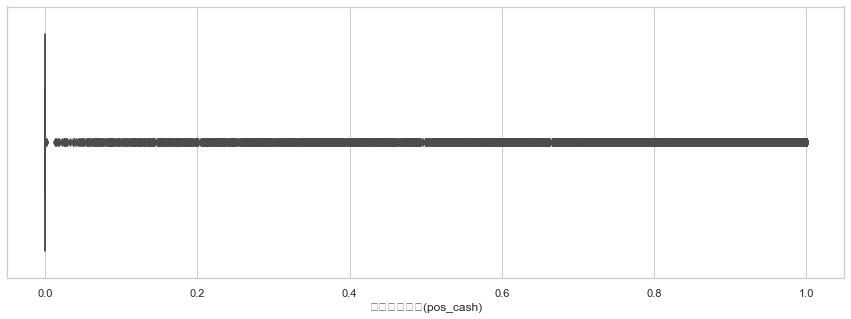

In [82]:
uf.box_plot(pos_cash_ds, "소액연체비중(pos_cash)")

In [92]:
temp_1 = pos_cash_ds.loc[pos_cash_ds["TARGET"] == 1, ["소액연체비중(pos_cash)"]]
temp_0 = pos_cash_ds.loc[pos_cash_ds["TARGET"] == 0, ["소액연체비중(pos_cash)"]]
plt.figure(figsize=(15, 5))
sns.set_theme(style="whitegrid",
              font="AppleGothic", 
              rc={"axes.unicode_minus":False}
             )
sns.kdeplot(data=temp_1, x="소액연체비중(pos_cash)", label="연체")
sns.kdeplot(data=temp_0, x="소액연체비중(pos_cash)", label="우량")
set(xlim=(0, 1))

plt.xlabel("힐부 연체 기간")
plt.ylabel("비율")
plt.title("POS 할부 연체 이력과 연체 가능성 비교")


KeyError: 'TARGET'

array([[<AxesSubplot:title={'center':'연체기간(pos_cash)'}>,
        <AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

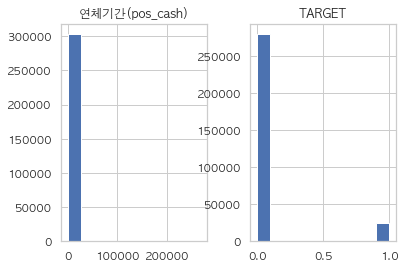

In [20]:
pos_cash_ds.iloc[:, [0, 2]].hist()